In [2]:
import pandas as pd
from rdr_scorer import RdR_scorer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

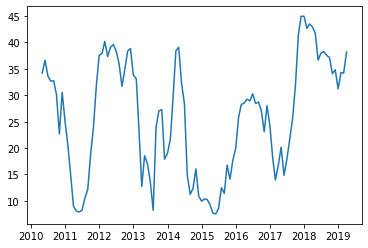

In [3]:
####IMPORTING TRAIN DATASET TIME SERIE
train_df = pd.read_csv('traindataset.csv', sep = ';')
train_df.index = pd.to_datetime(train_df['DATE'])
del train_df['DATE']
plt.plot(train_df)

In [4]:
####IMPORTING UNSEEN TEST DATASET
test_df = pd.read_csv('testdataset.csv', sep = ';')
test_df.index = pd.to_datetime(test_df['DATE'])
del test_df['DATE']
test_df

,TIME_SERIE
DATE,
2019-04-30,30.954167
2019-05-31,28.150000
2019-06-30,24.485833
2019-07-31,21.099167
2019-08-31,19.743333
2019-09-30,26.765833
2019-10-31,41.935000
2019-11-30,36.424167
2019-12-31,39.767500


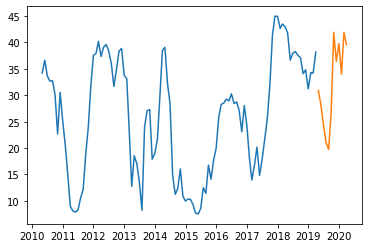

In [5]:
plt.plot(train_df)
plt.plot(test_df)

In [6]:
####IMPORTING DATASET WITH PREDICTIONS MADE ON UNSEEN TEST DATASET, TO VALIDATE
predictions_df = pd.read_csv('predictions.csv', sep = ';')
predictions_df.index = pd.to_datetime(predictions_df['DATE'])
del predictions_df['DATE']
predictions_df

,HOLT_PRED,SARIMA_PRED,SEQ2SEQ_PRED,LIGHTGBM_PRED
DATE,,,,
2019-04-30,37.129478,38.030973,39.856475,35.795426
2019-05-31,33.820947,36.784335,31.462613,35.576751
2019-06-30,35.646223,35.373679,19.577933,39.568254
2019-07-31,35.033637,34.070913,22.227599,38.695488
2019-08-31,35.224418,32.938090,29.857498,30.467430
2019-09-30,37.752241,31.973677,28.314368,28.551123
2019-10-31,39.040946,31.159068,28.083209,27.539737
2019-11-30,40.430967,30.473043,39.565804,30.214394
2019-12-31,37.799745,29.895963,44.214049,33.775221


In [7]:
##### CREATING RdR score object for each model forecast
rdr1 = RdR_scorer()
rdr1.fit(ts = train_df, 
         y_colname = 'TIME_SERIE', 
         n_step = len(test_df), 
         y_true = test_df, 
         y_pred = predictions_df['HOLT_PRED'], 
         model_name = 'Holt-Winters',
         freq = 12)
rdr1.score()


0.20181981780206276

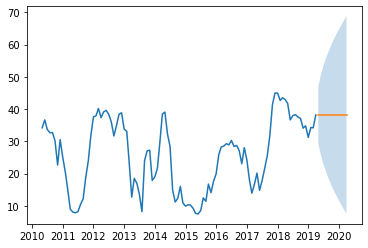

In [8]:
##### PLOT THE RANDOM WALK BASE MODEL
plt.plot(train_df)
plt.plot(rdr1.get_randomwalk_pred()['Y_PRED'])
plt.fill_between(rdr1.get_randomwalk_pred().index, 
                 rdr1.get_randomwalk_pred()['Y_PRED_LOWER'],
                 rdr1.get_randomwalk_pred()['Y_PRED_UPPER'],
                 alpha = 0.25)

In [9]:
##### FIT THE OTHER MODELS PREDICTIONS

#### SARIMA
rdr2 = RdR_scorer()
rdr2.fit(ts = train_df, 
         y_colname = 'TIME_SERIE', 
         n_step = len(test_df), 
         y_true = test_df, 
         y_pred = predictions_df['SARIMA_PRED'], 
         model_name = 'SARIMA',
         freq = 12)

#### LIGHTGBM
rdr3 = RdR_scorer()
rdr3.fit(ts = train_df, 
         y_colname = 'TIME_SERIE', 
         n_step = len(test_df), 
         y_true = test_df, 
         y_pred = predictions_df['LIGHTGBM_PRED'], 
         model_name = 'LIGHTGBM',
         freq = 12)

#### SEQ2SEQ
rdr4 = RdR_scorer()
rdr4.fit(ts = train_df, 
         y_colname = 'TIME_SERIE', 
         n_step = len(test_df), 
         y_true = test_df, 
         y_pred = predictions_df['SEQ2SEQ_PRED'], 
         model_name = 'SEQ2SEQ',
         freq = 12)

In [10]:
##### ADD RdR scores together to compare them later
rdr1.add_rdr(rdr2)
rdr1.add_rdr(rdr3)
rdr1.add_rdr(rdr4)

##### Show the resulting dataframe
rdr1.get_df_viz()

,DTW,RMSE,RdR_SCORE,MODEL_NAME
0,25.606861,8.267403,0.201820,Holt-Winters
1,33.981041,9.809482,0.000000,RandomWalk
2,30.540747,9.866793,0.047700,SARIMA
3,19.534346,9.626512,0.221896,LIGHTGBM
4,14.779255,6.956652,0.427949,SEQ2SEQ


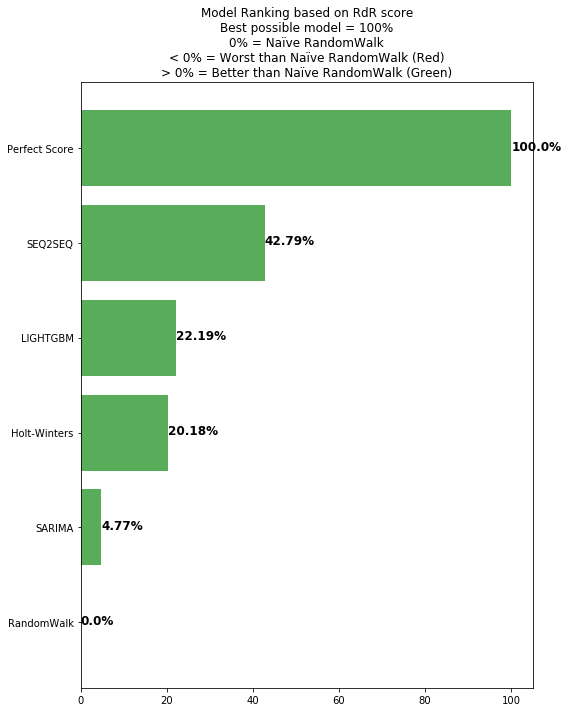

In [11]:
##### Compare the scores together
rdr1.plot_rdr_rank()

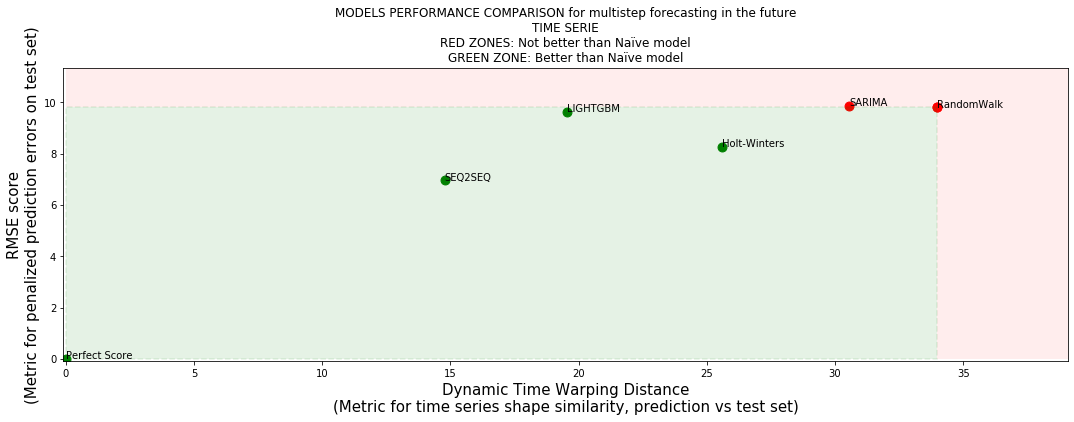

<Figure size 432x288 with 0 Axes>

In [12]:
##### Get RMSE and DTW detail
rdr1.plot_rdr()

In [13]:
##### Get Best model RdR interpretation
rdr4.get_rdr_interpretation()


'GOOD PERFORMANCE: With a stable trend and no major unpredictable changes, the model is 42.79% better than a naïve random decision. The mean forecast accuracy is 76.86% (around 64.76% and 83.41% of accuracy per forecasted datapoint)'

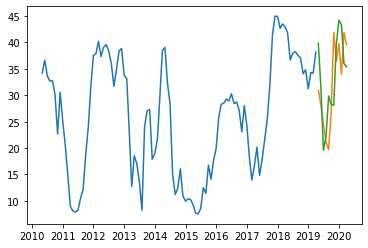

In [14]:
#### Plot forecast vs unseen test data: SEQ2SEQ
plt.plot(train_df)
plt.plot(test_df)
plt.plot(predictions_df['SEQ2SEQ_PRED'])

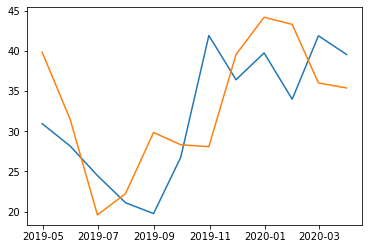

In [15]:
#### Plot ZOOMED forecast vs unseen test data: SEQ2SEQ
plt.plot(test_df)
plt.plot(predictions_df['SEQ2SEQ_PRED'])